# **WEB SCRAPING BCRP**
Este programa extrae los datos de la web de la **BCRP** haciendo peticiones que hacen en referencia al codigo de tabla utilizando su API.\
Los unicos datos a ingresar son el codigo y el periodo inicial a partir de la recoleccion de datos. Los resultados se obtendran hasta la fecha actual de corrido el programa.\
Los nombres de las **tablas** y sus respectivos **codigos** estaran dentro de la libreria de este programa.\
*Este codigo solo tiene la finalidad de actualizar informacion y conseguir los datos de forma agil.*\
**Nota:** En el excel anexado de codigos y nombres solo estan algunos relevantes para caso de estudio.

<div align="right">


PRODUCT OWNER **`INCOIN`**

</div>

*******

In [1]:
import pandas as pd
from datetime import datetime
import requests

cod_ser = "PN00001MM"

fecha_actual = datetime.now()
dia_actual = fecha_actual.day
mes_actual = fecha_actual.month
año_actual = fecha_actual.year
trimestre_actual = (fecha_actual.month - 1) // 3 + 1

if cod_ser.endswith("M"):
    Periodo_inicial = '2000-1'
    periodo_actual = f"{año_actual}-{mes_actual}"
    periodo_inicial = f"/{Periodo_inicial}/"
    periodo = periodo_inicial + periodo_actual
elif cod_ser.endswith("D"):
    Periodo_inicial = '2000-01-01'
    periodo_actual = f"{año_actual}-{mes_actual}-{dia_actual}"
    periodo_inicial = f"/{Periodo_inicial}/"
    periodo = periodo_inicial + periodo_actual
elif cod_ser.endswith("Q"):
    Periodo_inicial = "2000-1"
    periodo_actual = f"{año_actual}-{trimestre_actual}"
    periodo_inicial = f"/{Periodo_inicial}/"
    periodo = periodo_inicial + periodo_actual
else:
    
    periodo = "periodo_no_definido"

formato = "/json"
url_base = "https://estadisticas.bcrp.gob.pe/estadisticas/series/api/"
url = url_base + cod_ser + formato + periodo + '/'

print(url)

def get_response_meaning(response_code):
    if response_code == 200:
        return "Todo salió bien y se devolvió el resultado (si lo hubiera)."
    elif response_code == 301:
        return "El servidor lo redirige a un punto final diferente. Esto puede suceder cuando una empresa cambia los nombres de dominio o se cambia el nombre de un punto final."
    elif response_code == 400:
        return "El servidor cree que realizó una solicitud incorrecta. Esto puede suceder cuando no envía los datos correctos, entre otras cosas."
    elif response_code == 401:
        return "El servidor cree que no está autenticado. Muchas API requieren credenciales de inicio de sesión, por lo que esto sucede cuando no envía las credenciales correctas para acceder a una API."
    elif response_code == 403:
        return "El recurso al que intentas acceder está prohibido: no tienes los permisos adecuados para verlo."
    elif response_code == 404:
        return "El recurso al que intentó acceder no se encontró en el servidor."
    elif response_code == 503:
        return "El servidor no está listo para manejar la solicitud."
    else:
        return "Código de respuesta desconocido."

response = requests.get(url)
response_code = response.status_code
meaning = get_response_meaning(response_code)
print(f"Codigo ({response_code}): {meaning}")

response_json = response.json()
keys = list(response_json.keys())
diccionario_config = response_json[keys[0]]
titulo_key = list(diccionario_config.keys())[1]
diccionario_series = diccionario_config[titulo_key]
diccionario_series = diccionario_series[0]
series_key = list(diccionario_series.keys())
Titulo = diccionario_series[series_key[0]]
print('La tabla a extraer >>>>> ' + Titulo)

https://estadisticas.bcrp.gob.pe/estadisticas/series/api/PN00001MM/json/2000-1/2023-8/
Codigo (200): Todo salió bien y se devolvió el resultado (si lo hubiera).
La tabla a extraer >>>>> Cuentas monetarias de las sociedades creadoras de depósito - Activos Externos Netos de Corto Plazo (millones S/)


In [2]:
df = pd.DataFrame(response_json.get(keys[1]))
df['values'] = df['values'].apply(lambda x: float(x[0]))

df = df.rename(columns={'name': 'Fecha' ,'values': Titulo})

dias = {
    'Ene': 'Jan',
    'Feb': 'Feb',
    'Mar': 'Mar',
    'Abr': 'Apr',
    'May': 'May',
    'Jun': 'Jun',
    'Jul': 'Jul',
    'Ago': 'Aug',
    'Set': 'Sep',
    'Oct': 'Oct',
    'Nov': 'Nov',
    'Dic': 'Dec'
}
meses = {
    'Ene': 'Jan',
    'Feb': 'Feb',
    'Mar': 'Mar',
    'Abr': 'Apr',
    'May': 'May',
    'Jun': 'Jun',
    'Jul': 'Jul',
    'Ago': 'Aug',
    'Sep': 'Sep',
    'Oct': 'Oct',
    'Nov': 'Nov',
    'Dic': 'Dec'
}

def convertir_fecha_dias(fecha_str):
    dia, nombre_mes, year = fecha_str.split('.')
    abreviatura_mes = dias[nombre_mes]
    fecha_str_converted = f"{abreviatura_mes}.{dia}.20{year}"
    fecha_datetime = datetime.strptime(fecha_str_converted, '%b.%d.%Y')
    return fecha_datetime

def convertir_fecha_meses(fecha_str):
    nombre_mes, year = fecha_str.split('.')
    abreviatura_mes = meses[nombre_mes]
    fecha_datetime = datetime.strptime(abreviatura_mes + '.' + year, '%b.%Y')
    return fecha_datetime

def convertir_fecha_trimestre(trimestre_año):
    trimestre = int(trimestre_año[1])
    año = 2000 + int(trimestre_año[3:])
    mes = (trimestre - 1) * 3 + 1
    return datetime(año, mes, 1)

if cod_ser.endswith("M"):
    df['Fecha'] = df['Fecha'].apply(convertir_fecha_meses)
elif cod_ser.endswith("D"):
    df['Fecha'] = df['Fecha'].apply(convertir_fecha_dias)
elif cod_ser.endswith("Q"):
    df['Fecha'] = df['Fecha'].apply(convertir_fecha_trimestre)
else:
    
    periodo = "periodo_no_definido"
    
df

,Fecha,Cuentas monetarias de las sociedades creadoras de depósito - Activos Externos Netos de Corto Plazo (millones S/)
0,2000-01-01,28266.211490
1,2000-02-01,28079.167050
2,2000-03-01,28390.984920
3,2000-04-01,28882.990800
4,2000-05-01,29264.502150
...,...,...
277,2023-02-01,278536.957279
278,2023-03-01,274537.774645
279,2023-04-01,274617.355244
280,2023-05-01,277354.290858


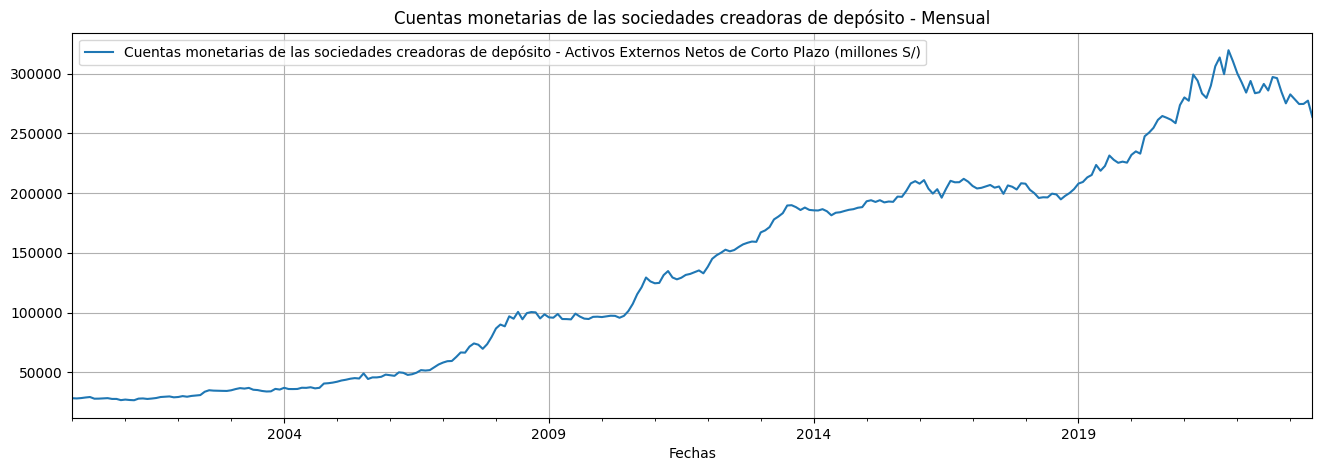

In [3]:
import matplotlib.pyplot as plt

if cod_ser.endswith("D"):
    Titulo_Periodicidad = "Diario"
elif cod_ser.endswith("M"):
    Titulo_Periodicidad = "Mensual"
elif cod_ser.endswith("Q"):
    Titulo_Periodicidad = "Trimestral"
else:
    Titulo_Periodicidad = "Periodo No Definido"

titulo_grafica = list(diccionario_config.keys())[0]

df_cols = df.columns.to_list()
df.plot(x = df_cols[0], y = df_cols[1], figsize = (16, 5), kind = 'line')

plt.xlabel("Fechas")
plt.title(diccionario_config[titulo_grafica] + ' - ' + Titulo_Periodicidad)
plt.grid()
plt.show()

In [ ]:
Titulo = Titulo.replace("/", "")
Nombre_Excel = str('Tablas_extraidas/') + periodo_actual + '_'+ Titulo + str('.xlsx')
df.to_excel(Nombre_Excel, index=False)